<a href="https://colab.research.google.com/github/chaitalisaha06/CSI_Assignments/blob/main/house_price_prediction_Data_Preprocessing_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/house_price_trainset.csv')
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
919,920,20,RL,87.0,11029,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,176500
1231,1232,90,RL,70.0,7728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2006,WD,Normal,132500
833,834,20,RL,100.0,10004,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,167000
653,654,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,135000
41,42,20,RL,115.0,16905,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,170000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.shape

(1460, 81)

In [ ]:
train = train.drop(['Id'], axis=1)

In [ ]:
for i in range(len(train.columns)):
  print(f'{train.columns[i]} : {len(train[train.columns[i]].value_counts())}')

MSSubClass : 15
MSZoning : 5
LotFrontage : 110
LotArea : 1073
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 3
MasVnrArea : 327
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinSF1 : 637
BsmtFinType2 : 6
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 5
GarageType : 6
GarageYrBlt : 97
GarageFinish : 3
GarageCars : 5
GarageArea : 441
GarageQual : 5
GarageCond : 5
PavedDrive : 3
Wo

## Handling Missing Values

In [ ]:
# Checking for missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [ ]:
# if the number of missing values in a column is more than 25% (365 entries) than I am dropping that column entirely

for column in train.columns:
    null_count = train[column].isnull().sum()
    if(null_count >= 365):
        train.drop(column, axis=1, inplace=True)

In [ ]:
missing_values=train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64

In [ ]:
train.shape

(1460, 74)

In [ ]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Dividing all features into numerical and categorical variables
numerical = train.select_dtypes(include=['number']).columns.to_list()
categorical=train.select_dtypes(exclude=['number']).columns.to_list()

In [ ]:
print(len(numerical))
print(len(categorical))

37
37


In [ ]:
# Imputing missing values in numerical columns with the median value

for column in numerical:
    train[column].fillna(train[column].median(), inplace=True)

In [ ]:
train["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
# Replace the missing values(nan) with appropriate label
train.loc[train['BsmtQual'].isna(), 'BsmtQual'] = 'No Basement'
train.loc[train['BsmtCond'].isna(), 'BsmtCond'] = 'No Basement'
train.loc[train['BsmtExposure'].isna(), 'BsmtExposure'] = 'No Basement'
train.loc[train['BsmtFinType1'].isna(), 'BsmtFinType1'] = 'No Basement'
train.loc[train['BsmtFinType2'].isna(), 'BsmtFinType2'] = 'No Basement'
train.loc[train['GarageType'].isna(), 'GarageType'] = 'No Garage'
train.loc[train['GarageYrBlt'].isna(), 'GarageYrBlt'] = 0
train.loc[train['GarageFinish'].isna(), 'GarageFinish'] = 'No Garage'
train.loc[train['GarageQual'].isna(), 'GarageQual'] = 'No Garage'
train.loc[train['GarageCond'].isna(), 'GarageCond'] = 'No Garage'

In [ ]:
missing_values=train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

Electrical    1
dtype: int64

In [ ]:
train.shape

(1460, 74)

## Label Encoding

In [ ]:
df_unique_categorical = {}

for col in categorical:
  df_unique_categorical[col] = len(train[col].value_counts())


df_unique_categorical_df = pd.DataFrame(list(df_unique_categorical.items()), columns=['Feature', 'UniqueValues'])

df_unique_categorical_df

,Feature,UniqueValues
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


In [ ]:
categorical_col_less = df_unique_categorical_df[df_unique_categorical_df.UniqueValues <= 7]

categorical_col_more = df_unique_categorical_df[df_unique_categorical_df.UniqueValues > 7]


In [ ]:
categorical_col_more

,Feature,UniqueValues
7,Neighborhood,25
8,Condition1,9
9,Condition2,8
11,HouseStyle,8
13,RoofMatl,8
14,Exterior1st,15
15,Exterior2nd,16
35,SaleType,9


In [ ]:
# dropping features with high number of unique values which can not be encoded
cols = categorical_col_more['Feature']
for col in cols:
  train.drop(col, axis=1, inplace=True)

train.shape

(1460, 66)

In [ ]:
df_train_4 = train.copy()
df_train_4.drop(numerical, axis=1, inplace=True)

if len(df_train_4.columns) == len(categorical_col_less):
  print("True")
else:
  print("False")

True


In [ ]:
df_train_4.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,ExterQual,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,Gd,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,1Fam,Gable,TA,...,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,Gable,Gd,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,Gable,TA,...,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,1Fam,Gable,Gd,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,Gable,TA,...,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,Gd,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,Gable,TA,...,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,TA,...,Y,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,2fmCon,Gable,TA,...,Y,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,Normal


In [ ]:
#label encoding categorical variables
label_encoder = LabelEncoder()

for col in df_train_4.columns:
  df_train_4[col] = label_encoder.fit_transform(df_train_4[col])

df_train_4.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,ExterQual,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition
0,3,1,3,3,0,4,0,0,1,2,...,1,4,2,6,1,2,5,5,2,4
1,3,1,3,3,0,2,0,0,1,3,...,1,4,3,6,1,2,5,5,2,4
2,3,1,0,3,0,4,0,0,1,2,...,1,4,2,6,1,2,5,5,2,4
3,3,1,0,3,0,0,0,0,1,3,...,1,4,2,6,5,3,5,5,2,0
4,3,1,0,3,0,2,0,0,1,2,...,1,4,2,6,1,2,5,5,2,4
5,3,1,0,3,0,4,0,0,1,3,...,1,4,3,6,1,3,5,5,2,4
6,3,1,3,3,0,4,0,0,1,2,...,1,4,2,6,1,2,5,5,2,4
7,3,1,0,3,0,0,0,0,1,3,...,1,4,3,6,1,2,5,5,2,4
8,4,1,3,3,0,4,0,0,1,3,...,1,1,3,2,5,3,1,5,2,0
9,3,1,3,3,0,0,0,1,1,3,...,1,4,3,6,1,2,2,5,2,4


In [ ]:
for col in df_train_4.columns:
  train[col] = df_train_4[col]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  BldgType       1460 non-null   int64  
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   int64  
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   int64  
 18  ExterCon

In [ ]:
categorical = train.select_dtypes(include=['object']).columns.to_list()
len(categorical)

0

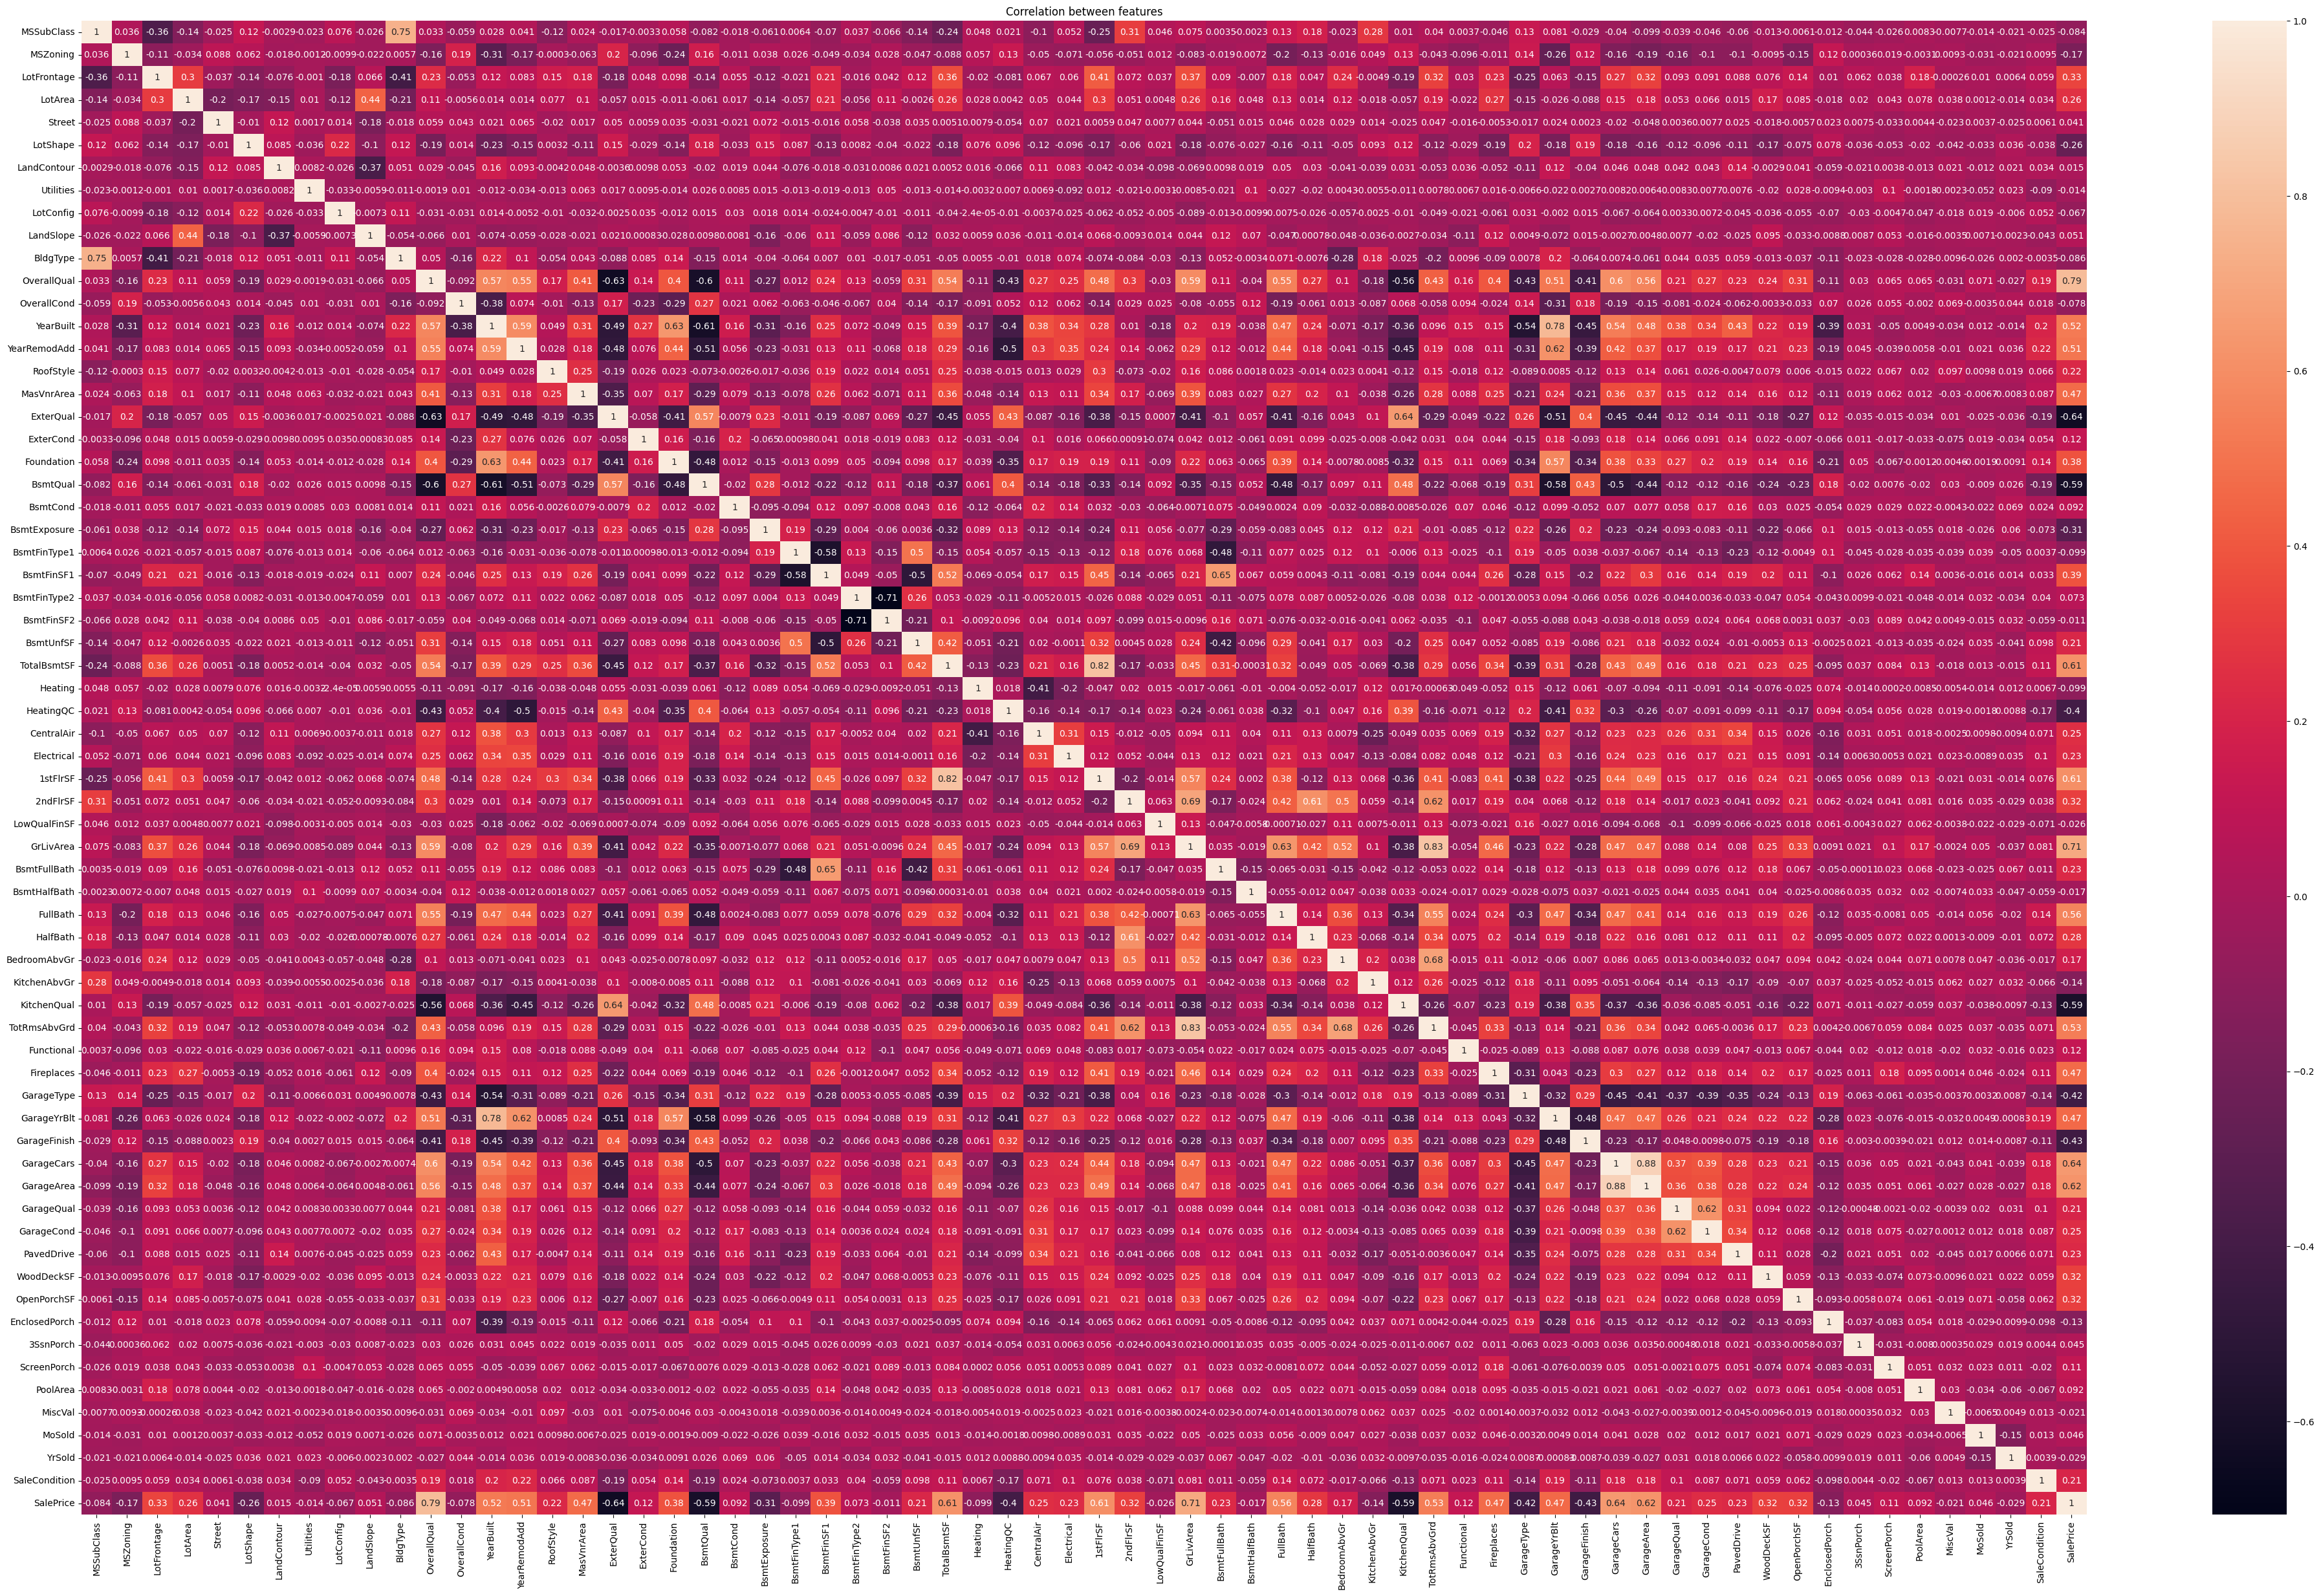

In [ ]:
#correlation within features
corr = train.corr()
plt.subplots(1,1, figsize=(50,30))
sns.heatmap(data=corr, annot = True)
plt.title('Correlation between features')
plt.show()

In [ ]:
train.shape

(1460, 66)

## Feature Engineering

In [ ]:
#forming new features use old features
def feature_engineering(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    return df
# Apply feature engineering to the train and test data
train_data = feature_engineering(train)

In [ ]:
train=train.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF","FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","YrSold","YearBuilt","YearRemodAdd"],axis=1)

In [ ]:
#correlation with the target variable
corr = train.corr()
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
GarageCars       0.640409
TotalBath        0.631731
GarageArea       0.623431
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334771
WoodDeckSF       0.324413
OpenPorchSF      0.315856
LotArea          0.263843
CentralAir       0.251328
GarageCond       0.246705
Electrical       0.234716
PavedDrive       0.231357
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
GarageQual       0.205963
BedroomAbvGr     0.168213
ExterCond        0.117303
Functional       0.115328
ScreenPorch      0.111447
PoolArea         0.092404
BsmtCond         0.091503
BsmtFinType2     0.072717
LandSlope        0.051152
MoSold           0.046432
3SsnPorch        0.044584
Street           0.041036
LandContour      0.015453
BsmtFinSF2      -0.011378
Utilities   

In [ ]:
train.shape

(1460, 60)

## Standard Scaling

In [ ]:
scaler = StandardScaler()
X=train.drop(["SalePrice"],axis=1)
y=train["SalePrice"]
X = scaler.fit_transform(X)